### Goals
Followings are the main goals to achieve in this project:

- extract information from the dataset to figure out relationship between features and house sale price
- reveal insight intuitively from EDA with data visualization and inferencial statistics
- construct Feature Engineering for Machine Learning model building
- build Machine Learning models to reasonably predict better house sale price

### Description de Variables
- SalePrice - the property's sale price in dollars. This is the target
- variable that you're trying to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: $Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale

# 1. Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error,r2_score
from sklearn.feature_selection import RFE

import warnings
warnings.filterwarnings('ignore')

# 2. Import Dataset

In [2]:
train = pd.read_csv('train.csv')
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
test = pd.read_csv('test.csv')
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [4]:
#store the length
train_len = len(train)
test_len = len(test)

In [9]:
#concatenate both dataframes
df = pd.concat([train,test],axis=0)
df.reset_index(drop=True,inplace=True)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [10]:
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN
2918,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,NaN


In [8]:
print(len(train),len(test),len(df))

1460 1459 2919


# 3. Data Understanding

In [12]:
pd.set_option('display.max_rows',81)

In [13]:
df.dtypes #returns the datatype of each column

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1       float64
BsmtFinType2      object
BsmtFinSF2       float64
BsmtUnfSF        float64
TotalBsmtSF      float64
Heating           object


In [14]:
df.isna().sum() #to check if the dataset contains any null or missing values

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinSF1          1
BsmtFinType2       80
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [15]:
df.shape #to find the number of rows and columns

(2919, 81)

In [16]:
df.describe(include='all') #to get the complete descriptive statistics.

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,2919.000000,2919.000000,2915,2433.000000,2919.000000,2919,198,2919,2919,2917,...,2919.000000,10,571,105,2919.000000,2919.000000,2919.000000,2918,2919,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Ex,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,2265,NaN,NaN,2907,120,1859,2622,2916,...,NaN,4,329,95,NaN,NaN,NaN,2525,2402,NaN
mean,1460.000000,57.137718,NaN,69.305795,10168.114080,NaN,NaN,NaN,NaN,NaN,...,2.251799,NaN,NaN,NaN,50.825968,6.213087,2007.792737,NaN,NaN,180921.195890
std,842.787043,42.517628,NaN,23.344905,7886.996359,NaN,NaN,NaN,NaN,NaN,...,35.663946,NaN,NaN,NaN,567.402211,2.714762,1.314964,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,730.500000,20.000000,NaN,59.000000,7478.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,4.000000,2007.000000,NaN,NaN,129975.000000
50%,1460.000000,50.000000,NaN,68.000000,9453.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,2189.500000,70.000000,NaN,80.000000,11570.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


In [17]:
null_percent = df.isna().sum()*100/df.shape[0] #to get the percent of null values present in each column

In [18]:
null_percent 

Id                0.000000
MSSubClass        0.000000
MSZoning          0.137033
LotFrontage      16.649538
LotArea           0.000000
Street            0.000000
Alley            93.216855
LotShape          0.000000
LandContour       0.000000
Utilities         0.068517
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.034258
Exterior2nd       0.034258
MasVnrType        0.822199
MasVnrArea        0.787941
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.774923
BsmtCond          2.809181
BsmtExposure      2.809181
BsmtFinType1      2.706406
BsmtFinSF1        0.034258
BsmtFinType2      2.740665
BsmtFinSF2        0.034258
B

In [19]:
x=df.isna()
x

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,True
2915,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,True
2916,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,True
2917,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,True


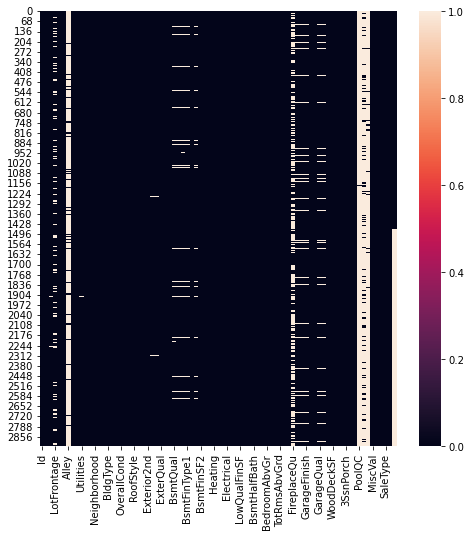

In [20]:
plt.figure(figsize=(8,8)) #heatmap to identify the features having null values
sns.heatmap(x)
plt.show()

# 4. Data Preparation

In [21]:
df.drop(labels=['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [22]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,6,2006,WD,Normal,NaN
2915,2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,4,2006,WD,Abnorml,NaN
2916,2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2006,WD,Abnorml,NaN
2917,2918,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,700,7,2006,WD,Normal,NaN


#### Separating Numerical and Categorical Data

In [23]:
numerical_data = df.select_dtypes(include=[np.number])
categorical_data = df.select_dtypes(exclude=[np.number])

In [24]:
numerical_data.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [25]:
categorical_data.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

#### Missing value treatment

In [26]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].median())
df['BsmtFinSF1'] = df['BsmtFinSF1'].fillna(df['BsmtFinSF1'].median())
df['BsmtFinSF2'] = df['BsmtFinSF2'].fillna(df['BsmtFinSF2'].median())
df['BsmtUnfSF'] = df['BsmtUnfSF'].fillna(df['BsmtUnfSF'].median())
df['TotalBsmtSF'] = df['TotalBsmtSF'].fillna(df['TotalBsmtSF'].median())
df['BsmtFullBath'] = df['BsmtFullBath'].fillna(df['BsmtFullBath'].median())
df['BsmtHalfBath'] = df['BsmtHalfBath'].fillna(df['BsmtHalfBath'].median())
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].median())
df['GarageCars'] = df['GarageCars'].fillna(df['GarageCars'].median())
df['GarageArea'] = df['GarageArea'].fillna(df['GarageArea'].median())

In [27]:
df['MasVnrType'] = df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])
df['GarageType'] = df['GarageType'].fillna(df['GarageType'].mode()[0])
df['GarageFinish'] = df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual'] = df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond'] = df['GarageCond'].fillna(df['GarageCond'].mode()[0])
df['BsmtQual'] = df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
df['BsmtCond'] = df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtExposure'] = df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
df['BsmtFinType1'] = df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])
df['BsmtFinType2'] = df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])
df['Utilities'] = df['Utilities'].fillna(df['Utilities'].mode()[0])
df['Exterior1st'] = df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])
df['Exterior2nd'] = df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])
df['KitchenQual'] = df['KitchenQual'].fillna(df['KitchenQual'].mode()[0])
df['Functional'] = df['Functional'].fillna(df['Functional'].mode()[0])

In [28]:
df.isna().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage         0
LotArea             0
Street              0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          0
MasVnrArea          0
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual            0
BsmtCond            0
BsmtExposure        0
BsmtFinType1        0
BsmtFinSF1          0
BsmtFinType2        0
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

**There are no missing values in the dataset**

#### checking outliers

<AxesSubplot:>

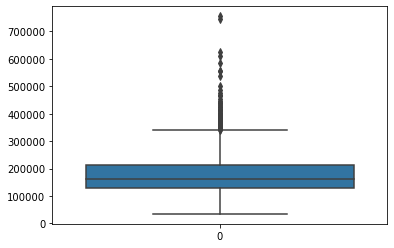

In [29]:
sns.boxplot(data=df['SalePrice'])

#### Removing Outliers

In [30]:
def outliers(df,SalePrice):
    q1=df[SalePrice].quantile(0.25)
    q3=df[SalePrice].quantile(0.75)
    iqr=q3-q1
    lower_limit=q1-1.5*(iqr)
    upper_limit=q1+1.5*(iqr)
    df[SalePrice]=np.where(df[SalePrice]>upper_limit,upper_limit,df[SalePrice])
    df[SalePrice]=np.where(df[SalePrice]<lower_limit,upper_limit,df[SalePrice])

<AxesSubplot:>

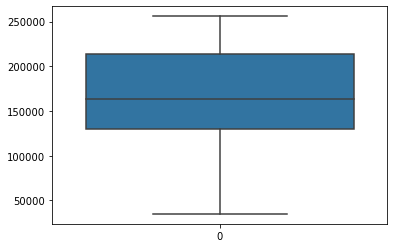

In [31]:
outliers(df,'SalePrice')
sns.boxplot(data=df['SalePrice'])

# 5. Visualization

Feature:  MSZoning
RL         0.777015
RM         0.157804
FV         0.047684
RH         0.008919
C (all)    0.008576
Name: MSZoning, dtype: float64


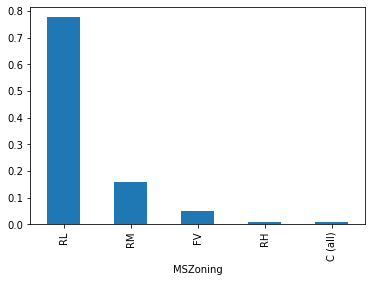



Feature:  Street
Pave    0.995889
Grvl    0.004111
Name: Street, dtype: float64


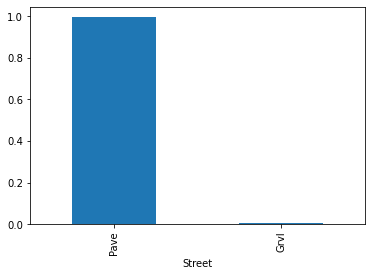



Feature:  LotShape
Reg    0.636862
IR1    0.331620
IR2    0.026036
IR3    0.005481
Name: LotShape, dtype: float64


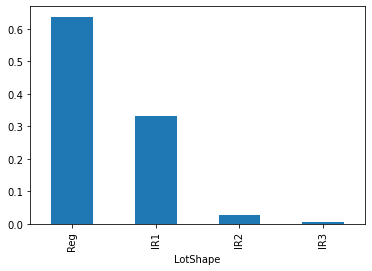



Feature:  LandContour
Lvl    0.898253
HLS    0.041110
Bnk    0.040082
Low    0.020555
Name: LandContour, dtype: float64


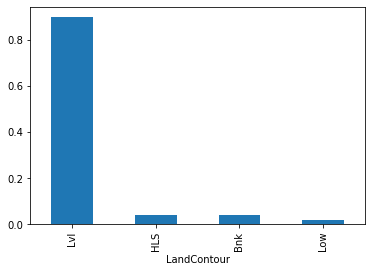



Feature:  Utilities
AllPub    0.999657
NoSeWa    0.000343
Name: Utilities, dtype: float64


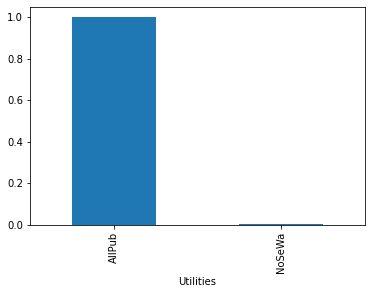



Feature:  LotConfig
Inside     0.730730
Corner     0.175060
CulDSac    0.060295
FR2        0.029120
FR3        0.004796
Name: LotConfig, dtype: float64


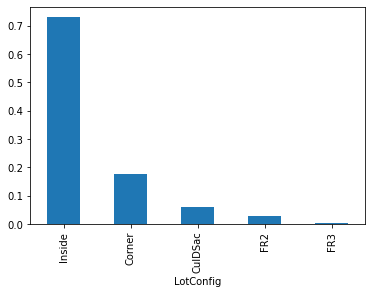



Feature:  LandSlope
Gtl    0.951696
Mod    0.042823
Sev    0.005481
Name: LandSlope, dtype: float64


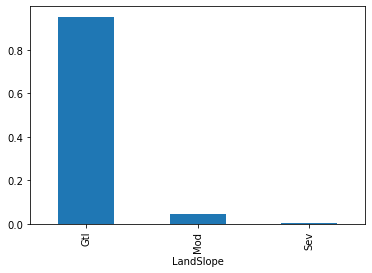



Feature:  Neighborhood
NAmes      0.151764
CollgCr    0.091470
OldTown    0.081877
Edwards    0.066461
Somerst    0.062350
NridgHt    0.056869
Gilbert    0.056526
Sawyer     0.051730
NWAmes     0.044878
SawyerW    0.042823
Mitchel    0.039054
BrkSide    0.036999
Crawfor    0.035286
IDOTRR     0.031860
Timber     0.024666
NoRidge    0.024323
StoneBr    0.017472
SWISU      0.016444
ClearCr    0.015074
MeadowV    0.012676
BrDale     0.010277
Blmngtn    0.009592
Veenker    0.008222
NPkVill    0.007879
Blueste    0.003426
Name: Neighborhood, dtype: float64


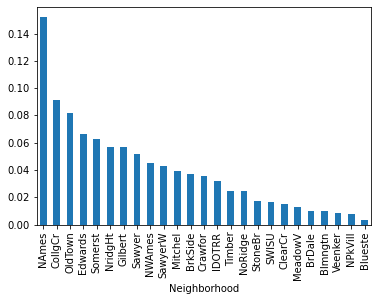



Feature:  Condition1
Norm      0.860226
Feedr     0.056184
Artery    0.031518
RRAn      0.017129
PosN      0.013361
RRAe      0.009592
PosA      0.006852
RRNn      0.003083
RRNe      0.002055
Name: Condition1, dtype: float64


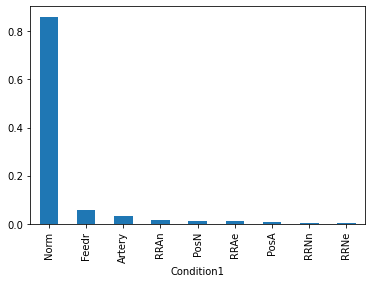



Feature:  Condition2
Norm      0.989723
Feedr     0.004454
Artery    0.001713
PosN      0.001370
PosA      0.001370
RRNn      0.000685
RRAn      0.000343
RRAe      0.000343
Name: Condition2, dtype: float64


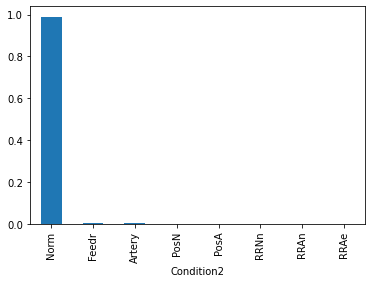



Feature:  BldgType
1Fam      0.830764
TwnhsE    0.077766
Duplex    0.037342
Twnhs     0.032888
2fmCon    0.021240
Name: BldgType, dtype: float64


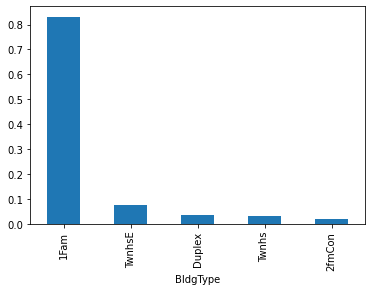



Feature:  HouseStyle
1Story    0.503940
2Story    0.298732
1.5Fin    0.107571
SLvl      0.043851
SFoyer    0.028434
2.5Unf    0.008222
1.5Unf    0.006509
2.5Fin    0.002741
Name: HouseStyle, dtype: float64


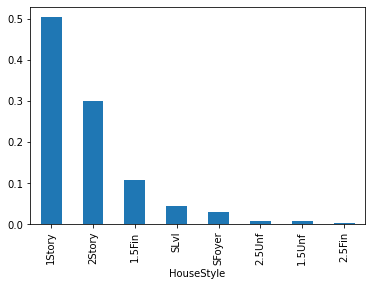



Feature:  RoofStyle
Gable      0.791367
Hip        0.188763
Gambrel    0.007537
Flat       0.006852
Mansard    0.003768
Shed       0.001713
Name: RoofStyle, dtype: float64


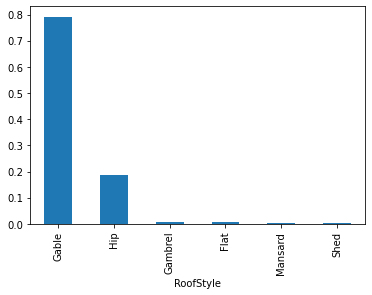



Feature:  RoofMatl
CompShg    0.985269
Tar&Grv    0.007879
WdShake    0.003083
WdShngl    0.002398
Metal      0.000343
Membran    0.000343
Roll       0.000343
ClyTile    0.000343
Name: RoofMatl, dtype: float64


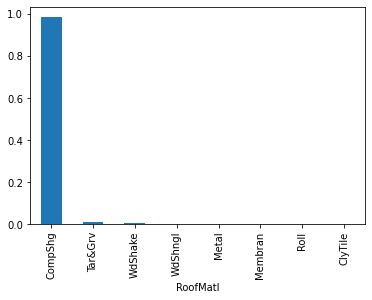



Feature:  Exterior1st
VinylSd    0.351490
MetalSd    0.154162
HdBoard    0.151422
Wd Sdng    0.140802
Plywood    0.075711
CemntBd    0.043165
BrkFace    0.029805
WdShing    0.019185
AsbShng    0.015074
Stucco     0.014731
BrkComm    0.002055
AsphShn    0.000685
Stone      0.000685
CBlock     0.000685
ImStucc    0.000343
Name: Exterior1st, dtype: float64


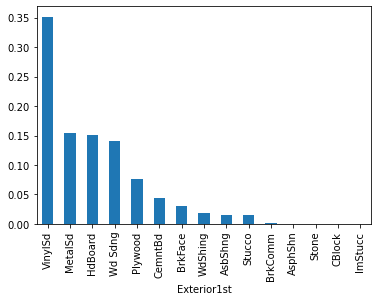



Feature:  Exterior2nd
VinylSd    0.347722
MetalSd    0.153135
HdBoard    0.139089
Wd Sdng    0.133950
Plywood    0.092497
CmentBd    0.043165
Wd Shng    0.027749
BrkFace    0.016101
Stucco     0.016101
AsbShng    0.013018
Brk Cmn    0.007537
ImStucc    0.005139
Stone      0.002055
AsphShn    0.001370
CBlock     0.001028
Other      0.000343
Name: Exterior2nd, dtype: float64


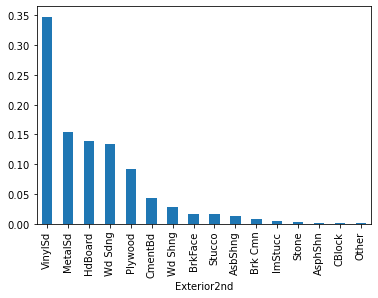



Feature:  MasVnrType
None       0.605002
BrkFace    0.301131
Stone      0.085303
BrkCmn     0.008565
Name: MasVnrType, dtype: float64


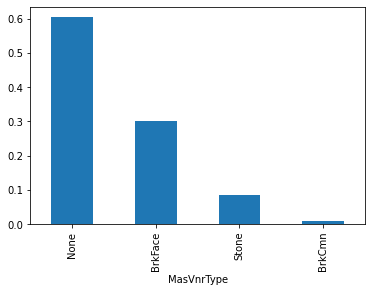



Feature:  ExterQual
TA    0.615964
Gd    0.335389
Ex    0.036656
Fa    0.011990
Name: ExterQual, dtype: float64


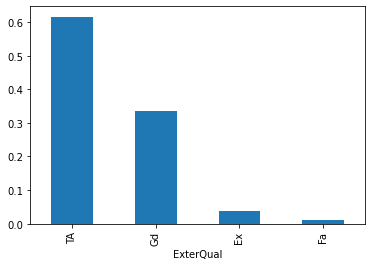



Feature:  ExterCond
TA    0.869476
Gd    0.102432
Fa    0.022953
Ex    0.004111
Po    0.001028
Name: ExterCond, dtype: float64


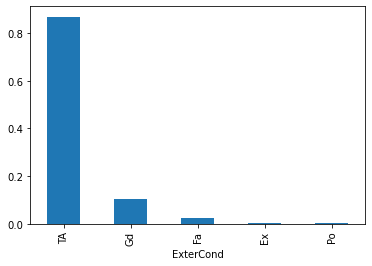



Feature:  Foundation
PConc     0.448099
CBlock    0.423090
BrkTil    0.106543
Slab      0.016787
Stone     0.003768
Wood      0.001713
Name: Foundation, dtype: float64


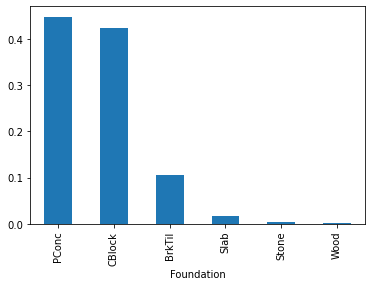



Feature:  BsmtQual
TA    0.467283
Gd    0.414183
Ex    0.088386
Fa    0.030147
Name: BsmtQual, dtype: float64


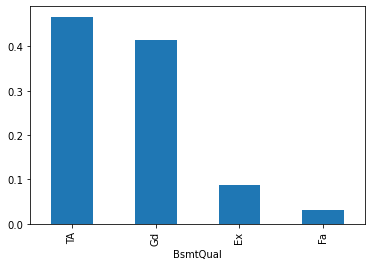



Feature:  BsmtCond
TA    0.920863
Gd    0.041795
Fa    0.035629
Po    0.001713
Name: BsmtCond, dtype: float64


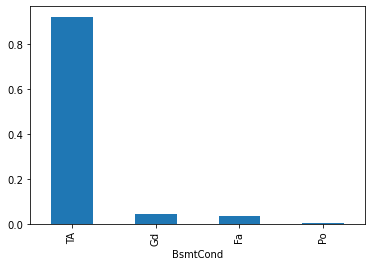



Feature:  BsmtExposure
No    0.680370
Av    0.143200
Gd    0.094553
Mn    0.081877
Name: BsmtExposure, dtype: float64


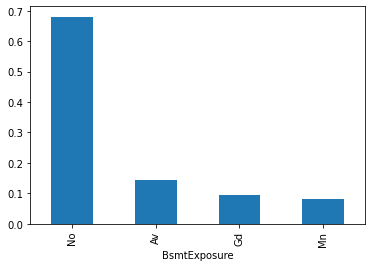



Feature:  BsmtFinType1
Unf    0.318602
GLQ    0.290853
ALQ    0.146968
Rec    0.098664
BLQ    0.092155
LwQ    0.052758
Name: BsmtFinType1, dtype: float64


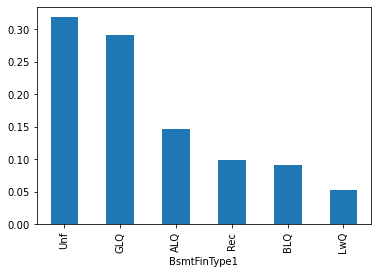



Feature:  BsmtFinType2
Unf    0.881466
Rec    0.035971
LwQ    0.029805
BLQ    0.023296
ALQ    0.017814
GLQ    0.011648
Name: BsmtFinType2, dtype: float64


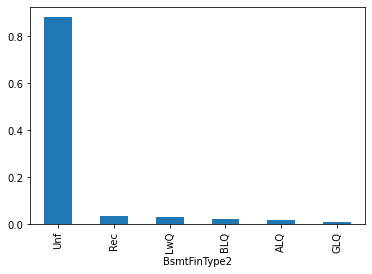



Feature:  Heating
GasA     0.984584
GasW     0.009250
Grav     0.003083
Wall     0.002055
OthW     0.000685
Floor    0.000343
Name: Heating, dtype: float64


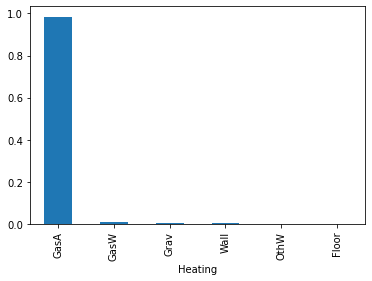



Feature:  HeatingQC
Ex    0.511477
TA    0.293594
Gd    0.162384
Fa    0.031518
Po    0.001028
Name: HeatingQC, dtype: float64


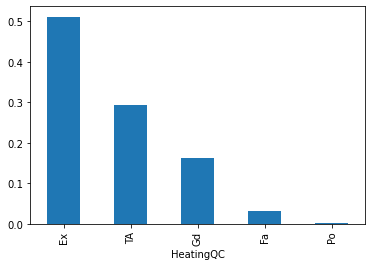



Feature:  CentralAir
Y    0.932854
N    0.067146
Name: CentralAir, dtype: float64


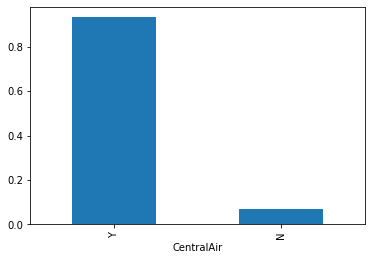



Feature:  Electrical
SBrkr    0.915382
FuseA    0.064406
FuseF    0.017129
FuseP    0.002741
Mix      0.000343
Name: Electrical, dtype: float64


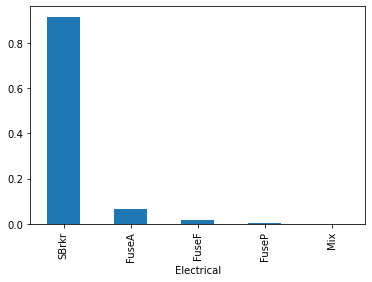



Feature:  KitchenQual
TA    0.511477
Gd    0.394313
Ex    0.070230
Fa    0.023981
Name: KitchenQual, dtype: float64


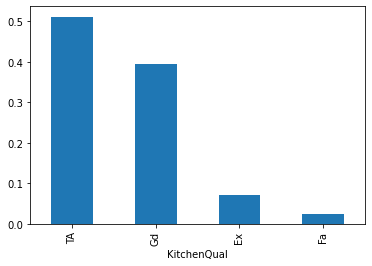



Feature:  Functional
Typ     0.931483
Min2    0.023981
Min1    0.022268
Mod     0.011990
Maj1    0.006509
Maj2    0.003083
Sev     0.000685
Name: Functional, dtype: float64


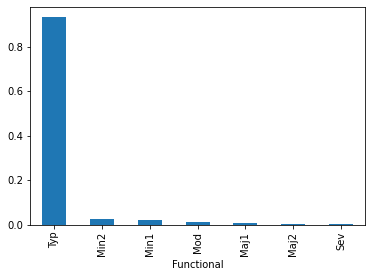



Feature:  GarageType
Attchd     0.644056
Detchd     0.266872
BuiltIn    0.063720
Basment    0.012333
2Types     0.007879
CarPort    0.005139
Name: GarageType, dtype: float64


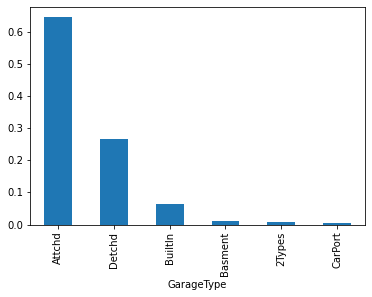



Feature:  GarageFinish
Unf    0.475848
RFn    0.277835
Fin    0.246317
Name: GarageFinish, dtype: float64


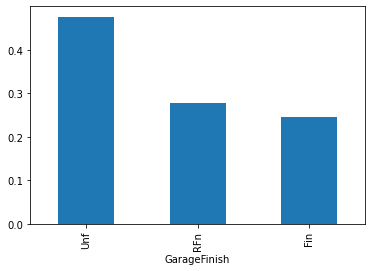



Feature:  GarageQual
TA    0.946557
Fa    0.042480
Gd    0.008222
Po    0.001713
Ex    0.001028
Name: GarageQual, dtype: float64


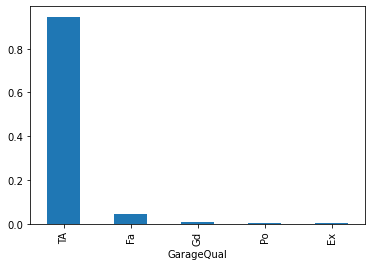



Feature:  GarageCond
TA    0.963686
Fa    0.025351
Gd    0.005139
Po    0.004796
Ex    0.001028
Name: GarageCond, dtype: float64


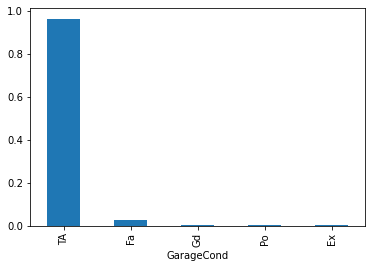



Feature:  PavedDrive
Y    0.904762
N    0.073998
P    0.021240
Name: PavedDrive, dtype: float64


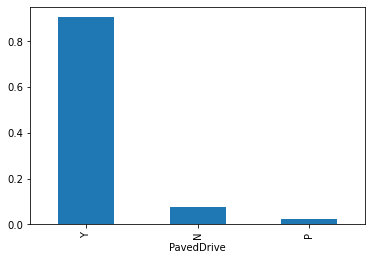



Feature:  SaleType
WD       0.865319
New      0.081905
COD      0.029815
ConLD    0.008910
CWD      0.004112
ConLI    0.003084
ConLw    0.002742
Oth      0.002399
Con      0.001714
Name: SaleType, dtype: float64


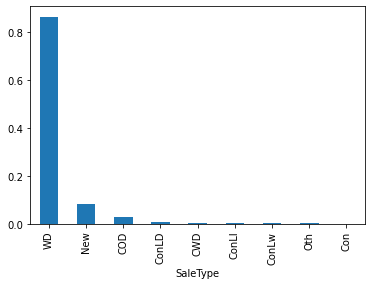



Feature:  SaleCondition
Normal     0.822885
Partial    0.083933
Abnorml    0.065091
Family     0.015759
Alloca     0.008222
AdjLand    0.004111
Name: SaleCondition, dtype: float64


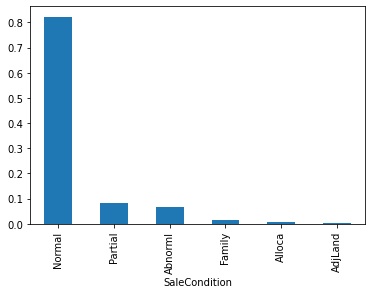

In [32]:
for i in categorical_data:
    print('Feature: ',i)
    print(df[i].value_counts(normalize=True))
    df[i].value_counts(normalize=True).plot(kind='bar')
    plt.xlabel(i)
    plt.show()
    print('\n')

Feature:  Id
1       0.000343
1940    0.000343
1942    0.000343
1943    0.000343
1944    0.000343
          ...   
976     0.000343
977     0.000343
978     0.000343
979     0.000343
2919    0.000343
Name: Id, Length: 2919, dtype: float64


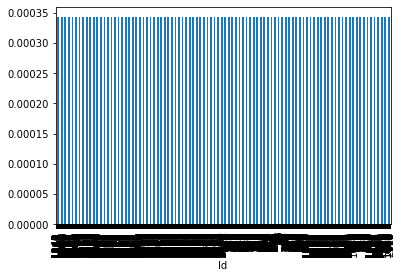



Feature:  MSSubClass
20     0.369647
60     0.196985
50     0.098321
120    0.062350
30     0.047619
70     0.043851
160    0.043851
80     0.040425
90     0.037342
190    0.020898
85     0.016444
75     0.007879
45     0.006166
180    0.005824
40     0.002055
150    0.000343
Name: MSSubClass, dtype: float64


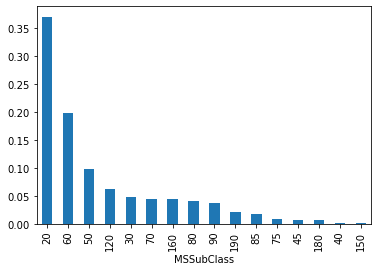



Feature:  LotFrontage
68.0     0.181569
60.0     0.094553
80.0     0.046934
70.0     0.045564
50.0     0.040082
           ...   
152.0    0.000343
138.0    0.000343
182.0    0.000343
168.0    0.000343
133.0    0.000343
Name: LotFrontage, Length: 128, dtype: float64


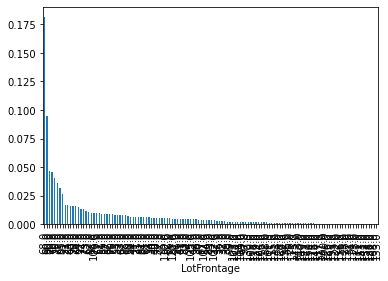



Feature:  LotArea
9600     0.015074
7200     0.014731
6000     0.011648
9000     0.009935
10800    0.008565
           ...   
15498    0.000343
9439     0.000343
7406     0.000343
3013     0.000343
10441    0.000343
Name: LotArea, Length: 1951, dtype: float64


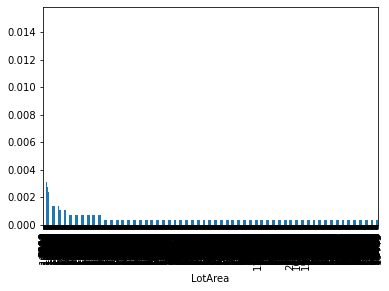



Feature:  OverallQual
5     0.282631
6     0.250428
7     0.205550
8     0.117163
4     0.077424
9     0.036656
3     0.013703
10    0.010620
2     0.004454
1     0.001370
Name: OverallQual, dtype: float64


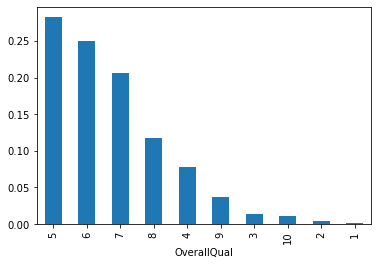



Feature:  OverallCond
5    0.563549
6    0.181912
7    0.133607
8    0.049332
4    0.034601
3    0.017129
9    0.014046
2    0.003426
1    0.002398
Name: OverallCond, dtype: float64


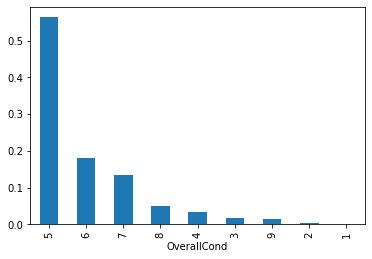



Feature:  YearBuilt
2005    0.048647
2006    0.047276
2007    0.037342
2004    0.033916
2003    0.030147
          ...   
1896    0.000343
1902    0.000343
1913    0.000343
1879    0.000343
1904    0.000343
Name: YearBuilt, Length: 118, dtype: float64


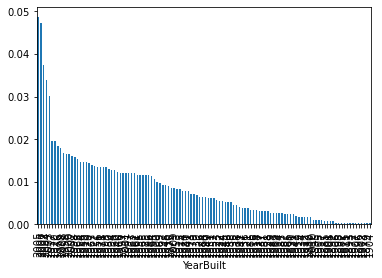



Feature:  YearRemodAdd
1950    0.123672
2006    0.069202
2007    0.056184
2005    0.048304
2004    0.038027
2000    0.035629
2003    0.033916
2002    0.028092
2008    0.027749
1998    0.026379
1999    0.020555
1996    0.020212
1995    0.019185
1994    0.018157
1997    0.016787
2001    0.016787
1976    0.016444
1977    0.015759
1970    0.015074
1993    0.014731
1968    0.013361
1978    0.012333
1972    0.011990
1967    0.011648
1958    0.011648
2009    0.011648
1992    0.010963
1971    0.010620
1956    0.010277
1963    0.010277
1959    0.010277
1975    0.010277
1990    0.009935
1991    0.009935
1960    0.009935
1965    0.009592
1954    0.009592
1966    0.009250
1969    0.008907
1964    0.008907
1980    0.008907
1962    0.008907
1955    0.008565
1961    0.008222
1979    0.008222
1973    0.007194
1953    0.006852
1957    0.006852
1984    0.006509
1974    0.006509
1989    0.006166
1987    0.005481
1952    0.005139
1988    0.005139
1985    0.004796
1951    0.004796
2010    0.004454
1986  

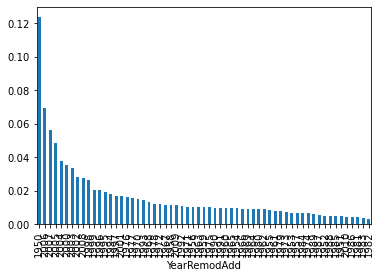



Feature:  MasVnrArea
0.0      0.603289
120.0    0.005139
176.0    0.004454
200.0    0.004454
216.0    0.004111
           ...   
137.0    0.000343
274.0    0.000343
415.0    0.000343
760.0    0.000343
382.0    0.000343
Name: MasVnrArea, Length: 444, dtype: float64


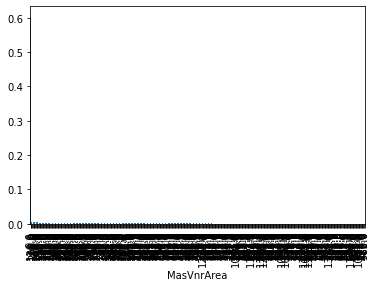



Feature:  BsmtFinSF1
0.0       0.318260
24.0      0.009250
16.0      0.004796
300.0     0.003083
20.0      0.002741
            ...   
383.0     0.000343
1085.0    0.000343
900.0     0.000343
1022.0    0.000343
337.0     0.000343
Name: BsmtFinSF1, Length: 992, dtype: float64


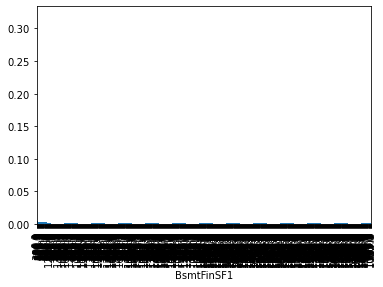



Feature:  BsmtFinSF2
0.0       0.881124
180.0     0.001713
294.0     0.001713
435.0     0.001028
483.0     0.001028
            ...   
600.0     0.000343
211.0     0.000343
1031.0    0.000343
438.0     0.000343
297.0     0.000343
Name: BsmtFinSF2, Length: 272, dtype: float64


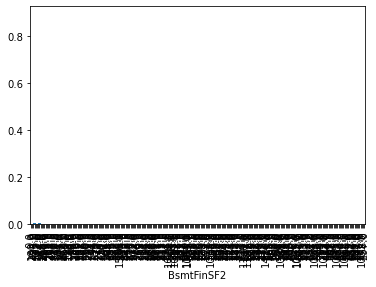



Feature:  BsmtUnfSF
0.0       0.082563
384.0     0.006509
728.0     0.004796
672.0     0.004454
600.0     0.004111
            ...   
257.0     0.000343
1217.0    0.000343
539.0     0.000343
39.0      0.000343
1503.0    0.000343
Name: BsmtUnfSF, Length: 1135, dtype: float64


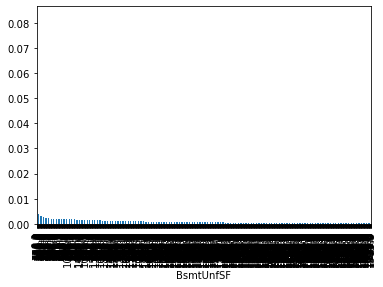



Feature:  TotalBsmtSF
0.0       0.026721
864.0     0.025351
672.0     0.009935
912.0     0.008907
1040.0    0.008565
            ...   
1571.0    0.000343
2633.0    0.000343
757.0     0.000343
873.0     0.000343
1381.0    0.000343
Name: TotalBsmtSF, Length: 1059, dtype: float64


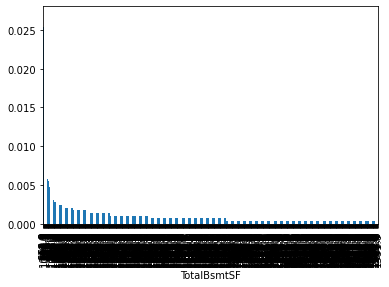



Feature:  1stFlrSF
864     0.015759
1040    0.009592
912     0.006509
848     0.006166
816     0.006166
          ...   
814     0.000343
1281    0.000343
1980    0.000343
1249    0.000343
1960    0.000343
Name: 1stFlrSF, Length: 1083, dtype: float64


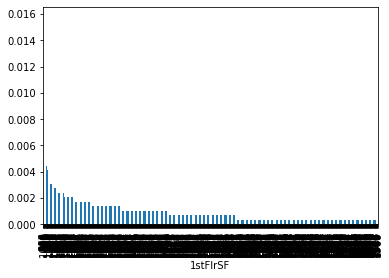



Feature:  2ndFlrSF
0       0.571429
546     0.007879
728     0.006166
504     0.005824
720     0.004454
          ...   
456     0.000343
831     0.000343
826     0.000343
985     0.000343
1004    0.000343
Name: 2ndFlrSF, Length: 635, dtype: float64


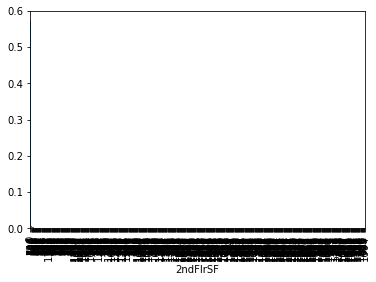



Feature:  LowQualFinSF
0       0.986297
80      0.001370
205     0.000685
360     0.000685
512     0.000343
697     0.000343
108     0.000343
312     0.000343
259     0.000343
514     0.000343
431     0.000343
1064    0.000343
362     0.000343
384     0.000343
114     0.000343
140     0.000343
479     0.000343
397     0.000343
436     0.000343
120     0.000343
481     0.000343
232     0.000343
53      0.000343
515     0.000343
156     0.000343
473     0.000343
420     0.000343
390     0.000343
371     0.000343
392     0.000343
144     0.000343
572     0.000343
528     0.000343
234     0.000343
513     0.000343
450     0.000343
Name: LowQualFinSF, dtype: float64


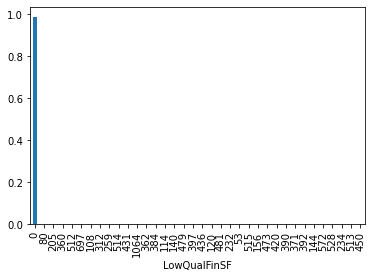



Feature:  GrLivArea
864     0.014046
1092    0.008907
1040    0.008565
1456    0.006852
1200    0.006166
          ...   
1459    0.000343
1247    0.000343
438     0.000343
2622    0.000343
1778    0.000343
Name: GrLivArea, Length: 1292, dtype: float64


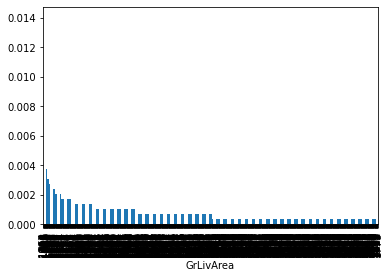



Feature:  BsmtFullBath
0.0    0.584789
1.0    0.401507
2.0    0.013018
3.0    0.000685
Name: BsmtFullBath, dtype: float64


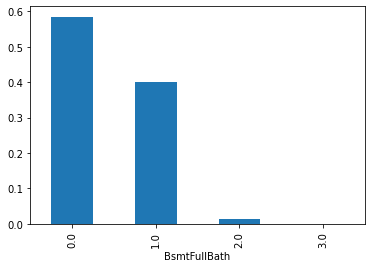



Feature:  BsmtHalfBath
0.0    0.940048
1.0    0.058582
2.0    0.001370
Name: BsmtHalfBath, dtype: float64


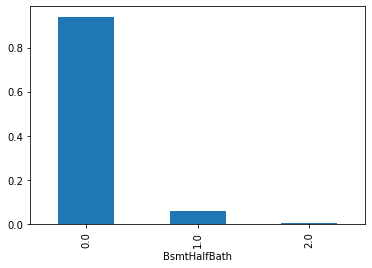



Feature:  FullBath
2    0.524152
1    0.448441
3    0.021925
0    0.004111
4    0.001370
Name: FullBath, dtype: float64


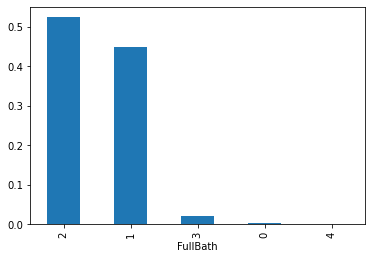



Feature:  HalfBath
0    0.628297
1    0.363138
2    0.008565
Name: HalfBath, dtype: float64


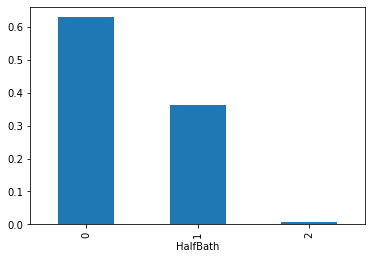



Feature:  BedroomAbvGr
3    0.546763
2    0.254197
4    0.137033
1    0.035286
5    0.016444
6    0.007194
0    0.002741
8    0.000343
Name: BedroomAbvGr, dtype: float64


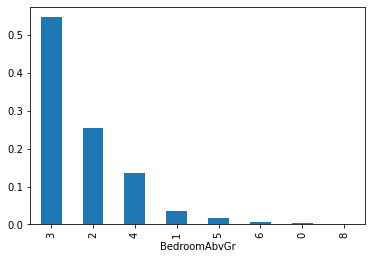



Feature:  KitchenAbvGr
1    0.954094
2    0.044193
0    0.001028
3    0.000685
Name: KitchenAbvGr, dtype: float64


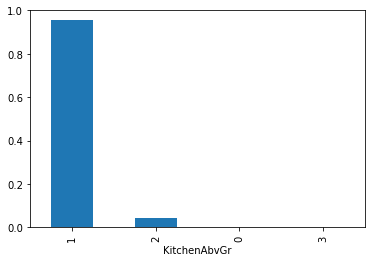



Feature:  TotRmsAbvGrd
6     0.289140
7     0.222336
5     0.199726
8     0.118876
4     0.067146
9     0.048989
10    0.027407
11    0.010963
3     0.008565
12    0.005481
2     0.000343
14    0.000343
13    0.000343
15    0.000343
Name: TotRmsAbvGrd, dtype: float64


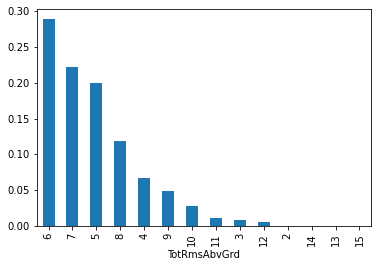



Feature:  Fireplaces
0    0.486468
1    0.434395
2    0.075026
3    0.003768
4    0.000343
Name: Fireplaces, dtype: float64


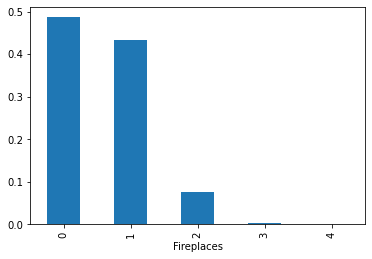



Feature:  GarageYrBlt
1979.0    0.066461
2005.0    0.048647
2006.0    0.039397
2007.0    0.039397
2004.0    0.033916
            ...   
1896.0    0.000343
1895.0    0.000343
2207.0    0.000343
1943.0    0.000343
1919.0    0.000343
Name: GarageYrBlt, Length: 103, dtype: float64


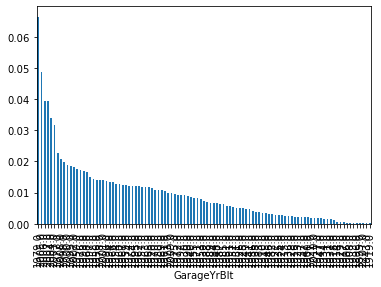



Feature:  GarageCars
2.0    0.546420
1.0    0.265844
3.0    0.128126
0.0    0.053786
4.0    0.005481
5.0    0.000343
Name: GarageCars, dtype: float64


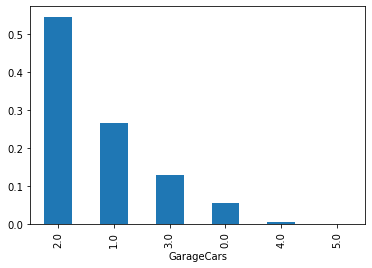



Feature:  GarageArea
0.0       0.053786
576.0     0.033231
440.0     0.032888
240.0     0.023638
484.0     0.023296
            ...   
872.0     0.000343
923.0     0.000343
192.0     0.000343
1025.0    0.000343
272.0     0.000343
Name: GarageArea, Length: 603, dtype: float64


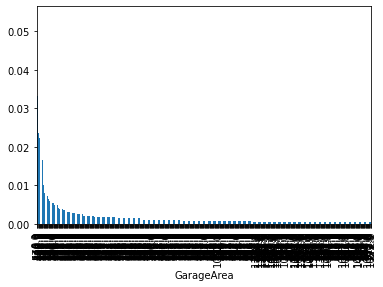



Feature:  WoodDeckSF
0      0.521754
100    0.025351
192    0.023981
144    0.020898
168    0.019185
         ...   
436    0.000343
448    0.000343
361    0.000343
362    0.000343
530    0.000343
Name: WoodDeckSF, Length: 379, dtype: float64


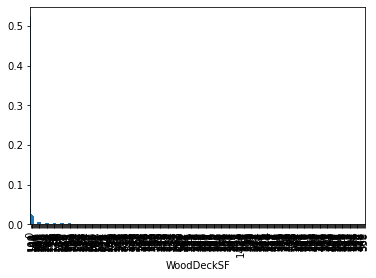



Feature:  OpenPorchSF
0      0.444673
36     0.017814
48     0.017472
40     0.015074
32     0.013018
         ...   
229    0.000343
205    0.000343
263    0.000343
213    0.000343
225    0.000343
Name: OpenPorchSF, Length: 252, dtype: float64


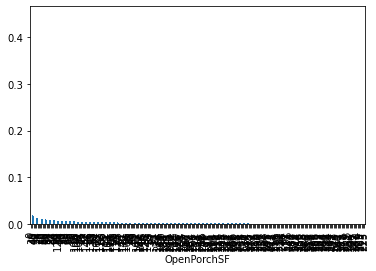



Feature:  EnclosedPorch
0      0.842754
112    0.007537
96     0.004454
144    0.003768
192    0.003426
         ...   
214    0.000343
220    0.000343
19     0.000343
174    0.000343
23     0.000343
Name: EnclosedPorch, Length: 183, dtype: float64


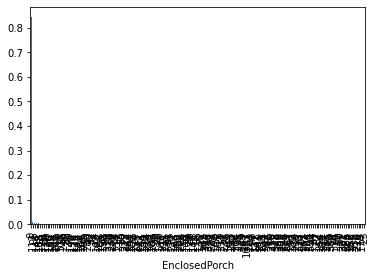



Feature:  3SsnPorch
0      0.987324
168    0.001028
153    0.001028
144    0.000685
216    0.000685
180    0.000685
140    0.000343
86     0.000343
176    0.000343
219    0.000343
120    0.000343
174    0.000343
150    0.000343
360    0.000343
225    0.000343
255    0.000343
224    0.000343
304    0.000343
290    0.000343
407    0.000343
96     0.000343
320    0.000343
23     0.000343
162    0.000343
182    0.000343
130    0.000343
196    0.000343
245    0.000343
238    0.000343
508    0.000343
323    0.000343
Name: 3SsnPorch, dtype: float64


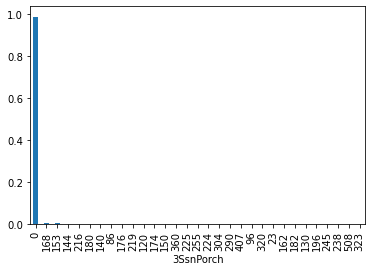



Feature:  ScreenPorch
0      0.912299
144    0.004454
192    0.003768
168    0.003426
120    0.003083
         ...   
233    0.000343
190    0.000343
265    0.000343
222    0.000343
104    0.000343
Name: ScreenPorch, Length: 121, dtype: float64


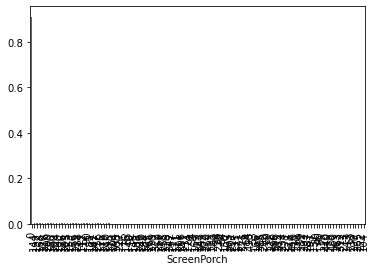



Feature:  PoolArea
0      0.995546
512    0.000343
648    0.000343
576    0.000343
555    0.000343
480    0.000343
519    0.000343
738    0.000343
144    0.000343
368    0.000343
444    0.000343
228    0.000343
561    0.000343
800    0.000343
Name: PoolArea, dtype: float64


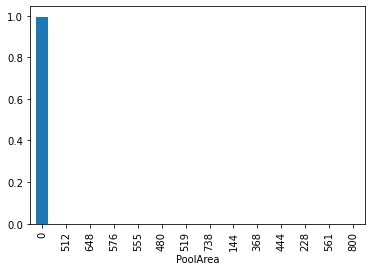



Feature:  MiscVal
0        0.964714
400      0.006166
500      0.004454
450      0.003083
600      0.002741
2000     0.002398
700      0.002398
1500     0.001028
650      0.001028
1200     0.001028
480      0.000685
2500     0.000685
3000     0.000685
4500     0.000685
750      0.000343
900      0.000343
17000    0.000343
6500     0.000343
1000     0.000343
80       0.000343
1512     0.000343
455      0.000343
460      0.000343
490      0.000343
1150     0.000343
300      0.000343
12500    0.000343
8300     0.000343
1400     0.000343
560      0.000343
620      0.000343
54       0.000343
1300     0.000343
3500     0.000343
800      0.000343
15500    0.000343
350      0.000343
420      0.000343
Name: MiscVal, dtype: float64


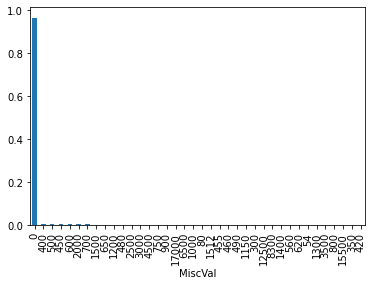



Feature:  MoSold
6     0.172319
7     0.152792
5     0.134978
4     0.095581
8     0.079822
3     0.079479
10    0.059267
9     0.054128
11    0.048647
2     0.045564
1     0.041795
12    0.035629
Name: MoSold, dtype: float64


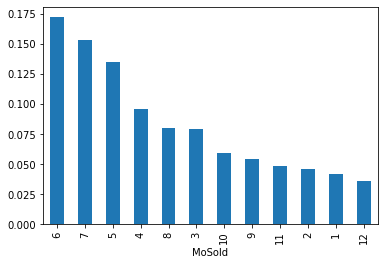



Feature:  YrSold
2007    0.237067
2009    0.221651
2008    0.213087
2006    0.212059
2010    0.116136
Name: YrSold, dtype: float64


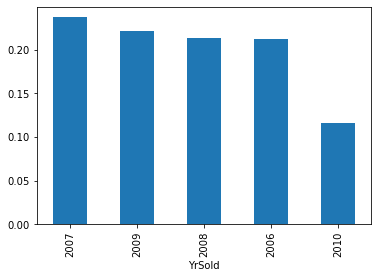



Feature:  SalePrice
256012.5    0.139041
140000.0    0.013699
135000.0    0.011644
155000.0    0.009589
145000.0    0.009589
              ...   
229000.0    0.000685
179665.0    0.000685
213250.0    0.000685
111250.0    0.000685
147500.0    0.000685
Name: SalePrice, Length: 508, dtype: float64


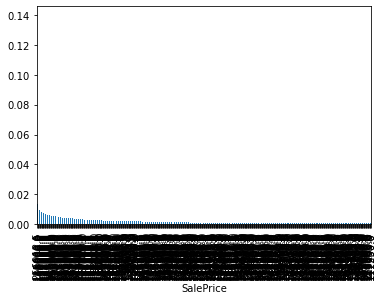

In [33]:
for i in numerical_data:
    print('Feature: ',i)
    print(df[i].value_counts(normalize=True))
    df[i].value_counts(normalize=True).plot(kind='bar')
    plt.xlabel(i)
    plt.show()
    print('\n')

# 6. Data Transformation

In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['MSZoning'] = le.fit_transform(df['MSZoning'])
df['Street'] = le.fit_transform(df['Street'])
df['LotShape'] = le.fit_transform(df['LotShape'])
df['LandContour'] = le.fit_transform(df['LandContour'])
df['Utilities'] = le.fit_transform(df['Utilities'])
df['LotConfig'] = le.fit_transform(df['LotConfig'])
df['LandSlope'] = le.fit_transform(df['LandSlope'])
df['Neighborhood'] = le.fit_transform(df['Neighborhood'])
df['Condition1'] = le.fit_transform(df['Condition1'])
df['Condition2'] = le.fit_transform(df['Condition2'])
df['BldgType'] = le.fit_transform(df['BldgType'])
df['HouseStyle'] = le.fit_transform(df['HouseStyle'])
df['RoofStyle'] = le.fit_transform(df['RoofStyle'])
df['RoofMatl'] = le.fit_transform(df['RoofMatl'])
df['Exterior1st'] = le.fit_transform(df['Exterior1st'])
df['Exterior2nd'] = le.fit_transform(df['Exterior2nd'])
df['MasVnrType'] = le.fit_transform(df['MasVnrType'])
df['ExterQual'] = le.fit_transform(df['ExterQual'])
df['ExterCond'] = le.fit_transform(df['ExterCond'])
df['Foundation'] = le.fit_transform(df['Foundation'])
df['BsmtQual'] = le.fit_transform(df['BsmtQual'])
df['BsmtCond'] = le.fit_transform(df['BsmtCond'])
df['BsmtExposure'] = le.fit_transform(df['BsmtExposure'])
df['BsmtFinType1'] = le.fit_transform(df['BsmtFinType1'])
df['BsmtFinType2'] = le.fit_transform(df['BsmtFinType2'])
df['Heating'] = le.fit_transform(df['Heating'])
df['HeatingQC'] = le.fit_transform(df['HeatingQC'])
df['CentralAir'] = le.fit_transform(df['CentralAir'])
df['Electrical'] = le.fit_transform(df['Electrical'])
df['KitchenQual'] = le.fit_transform(df['KitchenQual'])
df['Functional'] = le.fit_transform(df['Functional'])
df['GarageType'] = le.fit_transform(df['GarageType'])
df['GarageFinish'] = le.fit_transform(df['GarageFinish'])
df['GarageQual'] = le.fit_transform(df['GarageQual'])
df['GarageCond'] = le.fit_transform(df['GarageCond'])
df['PavedDrive'] = le.fit_transform(df['PavedDrive'])
df['SaleType'] = le.fit_transform(df['SaleType'])
df['SaleCondition'] = le.fit_transform(df['SaleCondition'])
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,3,3,0,4,...,0,0,0,0,0,2,2008,8,4,208500.0
1,2,20,3,80.0,9600,1,3,3,0,2,...,0,0,0,0,0,5,2007,8,4,181500.0
2,3,60,3,68.0,11250,1,0,3,0,4,...,0,0,0,0,0,9,2008,8,4,223500.0
3,4,70,3,60.0,9550,1,0,3,0,0,...,272,0,0,0,0,2,2006,8,0,140000.0
4,5,60,3,84.0,14260,1,0,3,0,2,...,0,0,0,0,0,12,2008,8,4,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,4,21.0,1936,1,3,3,0,4,...,0,0,0,0,0,6,2006,8,4,NaN
2915,2916,160,4,21.0,1894,1,3,3,0,4,...,0,0,0,0,0,4,2006,8,0,NaN
2916,2917,20,3,160.0,20000,1,3,3,0,4,...,0,0,0,0,0,9,2006,8,0,NaN
2917,2918,85,3,62.0,10441,1,3,3,0,4,...,0,0,0,0,700,7,2006,8,4,NaN


### Input Split

In [35]:
train = df.iloc[:train_len,:]
test = df.iloc[train_len:,:]

In [36]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,3,3,0,4,...,0,0,0,0,0,2,2008,8,4,208500.0
1,2,20,3,80.0,9600,1,3,3,0,2,...,0,0,0,0,0,5,2007,8,4,181500.0
2,3,60,3,68.0,11250,1,0,3,0,4,...,0,0,0,0,0,9,2008,8,4,223500.0
3,4,70,3,60.0,9550,1,0,3,0,0,...,272,0,0,0,0,2,2006,8,0,140000.0
4,5,60,3,84.0,14260,1,0,3,0,2,...,0,0,0,0,0,12,2008,8,4,250000.0


In [37]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1460,1461,20,2,80.0,11622,1,3,3,0,4,...,0,0,120,0,0,6,2010,8,4,NaN
1461,1462,20,3,81.0,14267,1,0,3,0,0,...,0,0,0,0,12500,6,2010,8,4,NaN
1462,1463,60,3,74.0,13830,1,0,3,0,4,...,0,0,0,0,0,3,2010,8,4,NaN
1463,1464,60,3,78.0,9978,1,0,3,0,4,...,0,0,0,0,0,6,2010,8,4,NaN
1464,1465,120,3,43.0,5005,1,0,1,0,4,...,0,0,144,0,0,1,2010,8,4,NaN


# 7. Model Building

In [38]:
X = train.drop('SalePrice',axis=1)
y = train[['SalePrice']]

In [39]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=12,shuffle=True)

In [40]:
X_train.shape,y_train.shape

((1168, 75), (1168, 1))

In [41]:
X_test.shape,y_test.shape

((292, 75), (292, 1))

The following models will the applied on the data:
1. Linear Regression
2. Support Vector Regressor
3. Decision Tree Regressor
4. Random Forest Regressor
5. Gradient boosting regressor

# 8. Model Training 

In [42]:
linear_model = LinearRegression()
svr_model = SVR()
dt_model = DecisionTreeRegressor()
rf_model = RandomForestRegressor()
gb_model = GradientBoostingRegressor()

### Training time analysis

In [43]:
%%time
linear_model.fit(X_train,y_train)

CPU times: total: 31.2 ms
Wall time: 32.2 ms


LinearRegression()

In [44]:
%%time
svr_model.fit(X_train,y_train)

CPU times: total: 188 ms
Wall time: 210 ms


SVR()

In [45]:
%%time
dt_model.fit(X_train,y_train)

CPU times: total: 31.2 ms
Wall time: 42 ms


DecisionTreeRegressor()

In [46]:
%%time
rf_model.fit(X_train,y_train)

CPU times: total: 2.81 s
Wall time: 2.94 s


RandomForestRegressor()

In [47]:
%%time
gb_model.fit(X_train,y_train)

CPU times: total: 875 ms
Wall time: 1.06 s


GradientBoostingRegressor()

# 9. Model Testing

#### For training data

In [48]:
y_pred_train_linear_model = linear_model.predict(X_train)
y_pred_train_svr = svr_model.predict(X_train)
y_pred_train_dt = dt_model.predict(X_train)
y_pred_train_rf = rf_model.predict(X_train)
y_pred_train_gb = gb_model.predict(X_train)

#### For testing data

In [49]:
y_pred_test_linear_model = linear_model.predict(X_test)
y_pred_test_svr = svr_model.predict(X_test)
y_pred_test_dt = dt_model.predict(X_test)
y_pred_test_rf = rf_model.predict(X_test)
y_pred_test_gb = gb_model.predict(X_test)

# 10. Model Evaluation

### 1. Linear Model Performance 

In [50]:
print('Training data :\n')
print('Mean Absolute Error:',mean_absolute_error(y_train,y_pred_train_linear_model))
print('Mean Absolute Percentage Error:',mean_absolute_percentage_error(y_train,y_pred_train_linear_model))
print('r2 score:',r2_score(y_train,y_pred_train_linear_model))
print('Mean Squared Error:',mean_squared_error(y_train,y_pred_train_linear_model))
data={'Linear Model':[mean_absolute_error(y_train,y_pred_train_linear_model),
                      mean_absolute_percentage_error(y_train,y_pred_train_linear_model),
                      r2_score(y_train,y_pred_train_linear_model),
                      mean_squared_error(y_train,y_pred_train_linear_model)]}
df_train=pd.DataFrame(data,index=['Mean Absolute Error','Mean Absolute Percentage Error','r2 score','Mean Squared Error'])
print('****************************************************************')
print('Testing data :\n')
print('Mean Absolute Error:',mean_absolute_error(y_test,y_pred_test_linear_model))
print('Mean Absolute Percentage Error:',mean_absolute_percentage_error(y_test,y_pred_test_linear_model))
print('r2 score:',r2_score(y_test,y_pred_test_linear_model))
print('Mean Squared Error:',mean_squared_error(y_test,y_pred_test_linear_model))
data1={'Logistic Model':[mean_absolute_error(y_test,y_pred_test_linear_model),
                      mean_absolute_percentage_error(y_test,y_pred_test_linear_model),
                      r2_score(y_test,y_pred_test_linear_model),
                      mean_squared_error(y_test,y_pred_test_linear_model)]}
df_test=pd.DataFrame(data1,index=['Mean Absolute Error','Mean Absolute Percentage Error','r2 score','Mean Squared Error'])

Training data :

Mean Absolute Error: 14239.352968442145
Mean Absolute Percentage Error: 0.09087730751098405
r2 score: 0.867697986465978
Mean Squared Error: 379543102.7751624
****************************************************************
Testing data :

Mean Absolute Error: 14654.503007734202
Mean Absolute Percentage Error: 0.09373496295551412
r2 score: 0.8504250231439157
Mean Squared Error: 448095766.93225485


### 2. Support Vector Regressor Performance

In [51]:
print('Training data :\n')
print('Mean Absolute Error:',mean_absolute_error(y_train,y_pred_train_svr))
print('Mean Absolute Percentage Error:',mean_absolute_percentage_error(y_train,y_pred_train_svr))
print('r2 score:',r2_score(y_train,y_pred_train_svr))
print('Mean Squared Error:',mean_squared_error(y_train,y_pred_train_svr))
df_train['SVM']=[mean_absolute_error(y_train,y_pred_train_svr),
                 mean_absolute_percentage_error(y_train,y_pred_train_svr),
                 r2_score(y_train,y_pred_train_svr),
                 mean_squared_error(y_train,y_pred_train_svr)]

print('****************************************************************')
print('Testing data :\n')
print('Mean Absolute Error:',mean_absolute_error(y_test,y_pred_test_svr))
print('Mean Absolute Percentage Error:',mean_absolute_percentage_error(y_test,y_pred_test_svr))
print('r2 score:',r2_score(y_test,y_pred_test_svr))
print('Mean Squared Error:',mean_squared_error(y_test,y_pred_test_svr))
df_test['SVM']=[mean_absolute_error(y_test,y_pred_test_svr),
                mean_absolute_percentage_error(y_test,y_pred_test_svr),
                r2_score(y_test,y_pred_test_svr),
                mean_squared_error(y_test,y_pred_test_svr)]

Training data :

Mean Absolute Error: 44881.69214497278
Mean Absolute Percentage Error: 0.2956022051370902
r2 score: -0.023624367186779516
Mean Squared Error: 2936535567.5288
****************************************************************
Testing data :

Mean Absolute Error: 45376.40781382122
Mean Absolute Percentage Error: 0.3065438578321347
r2 score: -0.02742156687031594
Mean Squared Error: 3077943013.2384877


### 3. Decision Tree Regressor Performance

In [52]:
print('Training data :\n')
print('Mean Absolute Error:',mean_absolute_error(y_train,y_pred_train_dt))
print('Mean Absolute Percentage Error:',mean_absolute_percentage_error(y_train,y_pred_train_dt))
print('r2 score:',r2_score(y_train,y_pred_train_dt))
print('Mean Squared Error:',mean_squared_error(y_train,y_pred_train_dt))
df_train['Decision Tree']=[mean_absolute_error(y_train,y_pred_train_dt),
                 mean_absolute_percentage_error(y_train,y_pred_train_dt),
                 r2_score(y_train,y_pred_train_dt),
                 mean_squared_error(y_train,y_pred_train_dt)]

print('****************************************************************')
print('Testing data :\n')
print('Mean Absolute Error:',mean_absolute_error(y_test,y_pred_test_dt))
print('Mean Absolute Percentage Error:',mean_absolute_percentage_error(y_test,y_pred_test_dt))
print('r2 score:',r2_score(y_test,y_pred_test_dt))
print('Mean Squared Error:',mean_squared_error(y_test,y_pred_test_dt))
df_test['Decision Tree']=[mean_absolute_error(y_test,y_pred_test_dt),
                mean_absolute_percentage_error(y_test,y_pred_test_dt),
                r2_score(y_test,y_pred_test_dt),
                mean_squared_error(y_test,y_pred_test_dt)]

Training data :

Mean Absolute Error: 0.0
Mean Absolute Percentage Error: 0.0
r2 score: 1.0
Mean Squared Error: 0.0
****************************************************************
Testing data :

Mean Absolute Error: 19288.986301369863
Mean Absolute Percentage Error: 0.1296316920110449
r2 score: 0.7280749648240372
Mean Squared Error: 814631295.5976027


### 4. Random Forest Regressor Performance

In [53]:
print('Training data :\n')
print('Mean Absolute Error:',mean_absolute_error(y_train,y_pred_train_rf))
print('Mean Absolute Percentage Error:',mean_absolute_percentage_error(y_train,y_pred_train_rf))
print('r2 score:',r2_score(y_train,y_pred_train_rf))
print('Mean Squared Error:',mean_squared_error(y_train,y_pred_train_rf))
df_train['Random Forest']=[mean_absolute_error(y_train,y_pred_train_rf),
                 mean_absolute_percentage_error(y_train,y_pred_train_rf),
                 r2_score(y_train,y_pred_train_rf),
                 mean_squared_error(y_train,y_pred_train_rf)]

print('****************************************************************')
print('Testing data :\n')
print('Mean Absolute Error:',mean_absolute_error(y_test,y_pred_test_rf))
print('Mean Absolute Percentage Error:',mean_absolute_percentage_error(y_test,y_pred_test_rf))
print('r2 score:',r2_score(y_test,y_pred_test_rf))
print('Mean Squared Error:',mean_squared_error(y_test,y_pred_test_rf))
df_test['Random Forest']=[mean_absolute_error(y_test,y_pred_test_rf),
                mean_absolute_percentage_error(y_test,y_pred_test_rf),
                r2_score(y_test,y_pred_test_rf),
                mean_squared_error(y_test,y_pred_test_rf)]

Training data :

Mean Absolute Error: 4874.335479452055
Mean Absolute Percentage Error: 0.03385303867035221
r2 score: 0.9827992020063789
Mean Squared Error: 49345010.452383734
****************************************************************
Testing data :

Mean Absolute Error: 12238.425308219177
Mean Absolute Percentage Error: 0.08532582334789111
r2 score: 0.9000103184418766
Mean Squared Error: 299548453.79123116


### 5. Gradient Boosting Regressor Performance

In [54]:
print('Training data :\n')
print('Mean Absolute Error:',mean_absolute_error(y_train,y_pred_train_gb))
print('Mean Absolute Percentage Error:',mean_absolute_percentage_error(y_train,y_pred_train_gb))
print('r2 score:',r2_score(y_train,y_pred_train_gb))
print('Mean Squared Error:',mean_squared_error(y_train,y_pred_train_gb))
df_train['Gradient Boosting']=[mean_absolute_error(y_train,y_pred_train_gb),
                 mean_absolute_percentage_error(y_train,y_pred_train_gb),
                 r2_score(y_train,y_pred_train_gb),
                 mean_squared_error(y_train,y_pred_train_gb)]

print('****************************************************************')
print('Testing data :\n')
print('Mean Absolute Error:',mean_absolute_error(y_test,y_pred_test_gb))
print('Mean Absolute Percentage Error:',mean_absolute_percentage_error(y_test,y_pred_test_gb))
print('r2 score:',r2_score(y_test,y_pred_test_gb))
print('Mean Squared Error:',mean_squared_error(y_test,y_pred_test_gb))
df_test['Gradient Boosting']=[mean_absolute_error(y_test,y_pred_test_gb),
                mean_absolute_percentage_error(y_test,y_pred_test_gb),
                r2_score(y_test,y_pred_test_gb),
                mean_squared_error(y_test,y_pred_test_gb)]

Training data :

Mean Absolute Error: 7976.400094591547
Mean Absolute Percentage Error: 0.05280480464134886
r2 score: 0.9587836385622965
Mean Squared Error: 118239966.93100797
****************************************************************
Testing data :

Mean Absolute Error: 11596.639935000918
Mean Absolute Percentage Error: 0.0790829518856812
r2 score: 0.9178199236068094
Mean Squared Error: 246194551.60196525


In [55]:
df_train.T

,Mean Absolute Error,Mean Absolute Percentage Error,r2 score,Mean Squared Error
Linear Model,14239.352968,0.090877,0.867698,3.795431e+08
SVM,44881.692145,0.295602,-0.023624,2.936536e+09
Decision Tree,0.000000,0.000000,1.000000,0.000000e+00
Random Forest,4874.335479,0.033853,0.982799,4.934501e+07
Gradient Boosting,7976.400095,0.052805,0.958784,1.182400e+08


In [56]:
df_test.T

,Mean Absolute Error,Mean Absolute Percentage Error,r2 score,Mean Squared Error
Logistic Model,14654.503008,0.093735,0.850425,4.480958e+08
SVM,45376.407814,0.306544,-0.027422,3.077943e+09
Decision Tree,19288.986301,0.129632,0.728075,8.146313e+08
Random Forest,12238.425308,0.085326,0.900010,2.995485e+08
Gradient Boosting,11596.639935,0.079083,0.917820,2.461946e+08


**Here Gradient Boosting Model is performing well**

# 11. Feature Engineering

#### Using RFE [ Recursive Feature Elimination ]

In [57]:
rfe_model = RFE(estimator=GradientBoostingRegressor(random_state=15),n_features_to_select=None)
rfe_model.fit(X_train,y_train)

RFE(estimator=GradientBoostingRegressor(random_state=15))

In [58]:
rfe_model.get_support()

array([False, False,  True,  True,  True, False, False,  True, False,
       False, False,  True,  True, False, False, False,  True,  True,
        True,  True,  True, False,  True, False, False, False, False,
       False, False, False, False,  True,  True,  True, False, False,
        True,  True, False, False,  True, False,  True,  True, False,
        True,  True, False,  True,  True, False, False,  True, False,
        True,  True,  True,  True,  True,  True,  True, False, False,
        True,  True,  True, False, False,  True, False, False, False,
       False, False,  True])

In [59]:
X_train.columns[rfe_model.get_support()]

Index(['MSZoning', 'LotFrontage', 'LotArea', 'LandContour', 'Neighborhood',
       'Condition1', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'Exterior1st', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'KitchenQual', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'ScreenPorch', 'SaleCondition'],
      dtype='object')

In [60]:
len(X_train.columns[rfe_model.get_support()])

37

In [61]:
X_train_rfe_selected = rfe_model.transform(X_train)
X_test_rfe_selected = rfe_model.transform(X_test)

In [62]:
X_train_rfe_selected.shape

(1168, 37)

In [63]:
X_test_rfe_selected.shape

(292, 37)

In [64]:
def run_GradientBoostingRegressor(X_train,y_train,X_test,y_test):
    gb_regressor = GradientBoostingRegressor(random_state=15)
    gb_regressor.fit(X_train,y_train)

    y_pred = gb_regressor.predict(X_test)
    print('Mean Absolute Error:',mean_absolute_error(y_test,y_pred))
    print('Mean Absolute Percentage Error:',mean_absolute_percentage_error(y_test,y_pred))
    print('r2 score:',r2_score(y_test,y_pred))
    print('Mean Squared Error:',mean_squared_error(y_test,y_pred))

In [65]:
run_GradientBoostingRegressor(X_train_rfe_selected,y_train,X_test_rfe_selected,y_test)

Mean Absolute Error: 11414.226117208334
Mean Absolute Percentage Error: 0.07766177842898678
r2 score: 0.9186690507358325
Mean Squared Error: 243650741.93473282


**After doing the Feature Engineering, The Gradient Boosting Model is still performing good**

# Prediction on test data

In [68]:
x_test = test.drop('SalePrice',axis=1)
x_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1460,1461,20,2,80.0,11622,1,3,3,0,4,...,0,0,0,120,0,0,6,2010,8,4
1461,1462,20,3,81.0,14267,1,0,3,0,0,...,36,0,0,0,0,12500,6,2010,8,4
1462,1463,60,3,74.0,13830,1,0,3,0,4,...,34,0,0,0,0,0,3,2010,8,4
1463,1464,60,3,78.0,9978,1,0,3,0,4,...,36,0,0,0,0,0,6,2010,8,4
1464,1465,120,3,43.0,5005,1,0,1,0,4,...,82,0,0,144,0,0,1,2010,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,4,21.0,1936,1,3,3,0,4,...,0,0,0,0,0,0,6,2006,8,4
2915,2916,160,4,21.0,1894,1,3,3,0,4,...,24,0,0,0,0,0,4,2006,8,0
2916,2917,20,3,160.0,20000,1,3,3,0,4,...,0,0,0,0,0,0,9,2006,8,0
2917,2918,85,3,62.0,10441,1,3,3,0,4,...,32,0,0,0,0,700,7,2006,8,4


In [69]:
model=GradientBoostingRegressor()
model.fit(X,y)

GradientBoostingRegressor()

In [70]:
pred = model.predict(x_test)
pred

array([124190.03649392, 153413.7540484 , 184593.01725977, ...,
       158705.88518539, 124383.58197621, 224378.68535252])

In [73]:
submission=pd.DataFrame()
submission['id']=x_test["Id"]
submission['SalePrice'] = pred
submission.head()

,id,SalePrice
1460,1461,124190.036494
1461,1462,153413.754048
1462,1463,184593.017260
1463,1464,187848.218004
1464,1465,203532.558646


In [74]:
submission.to_csv('my_submission.csv',index=False)